# EMC 410103 - Fundamentos de Análise Modal
# Lucas Zambrano Barboza
## Lista 3

### Questão 1
Plot do espectro da função
$$ g(t) = \sin \left(\omega t \right) = \sin \left( \frac{2\pi}{f}t \right);$$
para $f = 100\, \mathrm{Hz}$, com taxa de amostragem $\Delta f = 400$ amostras por segundo para um tempo total de amostragem de $1$ segundo.

In [1]:
import numpy as np
import scipy.linalg as linalg
import matplotlib.pyplot as plt
from scipy.fft import fft,ifft,fftshift,fftfreq,rfft
from matplotlib import rc
import os
# Pacote para definição do grid do plot
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# Configura fontes dos plots
#rc('text', usetex=True)
#rc('font', family='serif')

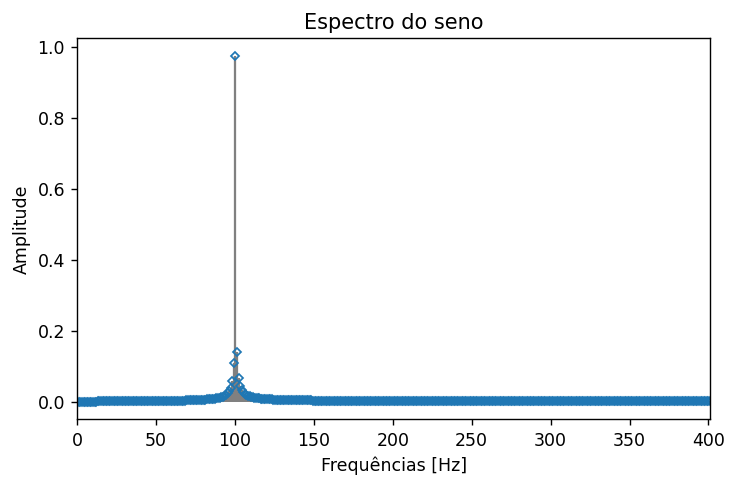

In [2]:
# Definição dos parâmetros do problema
frequencia_1 = 100 # [Hz]
g = lambda t: np.sin(2*np.pi*t*frequencia_1)
numero_amostras_1 = 400
tempo_total_1 = 1

amostras_1 = np.linspace(0,tempo_total_1,2*numero_amostras_1+1)
resposta_1 = g(amostras_1)

resposta_espectral_1 = np.abs(fftshift(fft(resposta_1)))/numero_amostras_1
frequencias_1 = np.linspace(0,numero_amostras_1+1,numero_amostras_1+1)
fig = plt.figure(dpi=125)
ax = fig.add_subplot(111)
ax.set_ylabel("Amplitude")
ax.set_xlabel("Frequências [Hz]")
ax.set_title("Espectro do seno")
markerline, stemlines, baseline = plt.stem(frequencias_1,
                                           resposta_espectral_1[numero_amostras_1:],
                                           linefmt='gray',
                                           markerfmt='D',
                                           basefmt='none',
                                           use_line_collection=True)
markerline.set_markerfacecolor('none')
markerline.set_markersize(3)
stemlines.set_linewidth(1.3)
ax.set_xlim([0,frequencias_1[-1]])
plt.tight_layout()

In [3]:
resposta_espectral_pos_1 = resposta_espectral_1[numero_amostras_1:]

print("Valor do pico: {:.2f}".format(resposta_espectral_pos_1[100]))
print('{:=^40}'.format(''))
print("Amplitudes adjacentes: {:.2f}\t{:.2f}".format(resposta_espectral_pos_1[99],
                                                     resposta_espectral_pos_1[101]))

Valor do pico: 0.98
Amplitudes adjacentes: 0.11	0.14


Os valores adjacentes são muito menores do que $\left|\mathrm{pico}\right|/\sqrt{2}$, de modo que o método da banda de meia potência não pode ser utilizado. Não existem pontos na banda de meia potência. Porém, fica claro que a largura da banda é menor do que $2\,\mathrm{Hz}$.

Usaremos as duas frequências adjacentes para calcular o fator de amortecimento, i.e.,
$$ \eta = \frac{\omega_2^2 - \omega_1^2}{2\omega^2}.$$

In [4]:
amortecimento_1 = ((frequencias_1[101]**2 - frequencias_1[99]**2)
                 / (2*frequencias_1[100]**2))
print("Fator de amortecimento: {:.4f}".format(amortecimento_1))

Fator de amortecimento: 0.0200


Comparação entre valor RMS do sinal no tempo e soma das magnitudes dos quadrados das componentes espectrais.

In [5]:
rms_sinal_1 = np.sqrt(np.sum(resposta_1*resposta_1)/np.size(resposta_1))
print("RMS da resposta: {:.5}".format(rms_sinal_1))
print("{:=^40}".format(''))
soma_magnitudes_1 = np.sum(resposta_espectral_pos_1*resposta_espectral_pos_1)
print("Soma das magnitudes ao quadrado do espectro: {:.5f}".format(soma_magnitudes_1))
print("{:=^40}".format(""))
print("Razão Magnitudes ao quadrado/RMS: {:.5f}".format(soma_magnitudes_1
                                                        /rms_sinal_1))

RMS da resposta: 0.70667
Soma das magnitudes ao quadrado do espectro: 1.00125
Razão Magnitudes ao quadrado/RMS: 1.41687


É possível perceber que a razão entre a soma das magnitudes das componentes espectrais ao quadrado e o valor RMS do sinal de entrada é aproximadamente igual a $\sqrt{2}$.

### Questão 2
Repetição dos cálculos para 100 amostras.

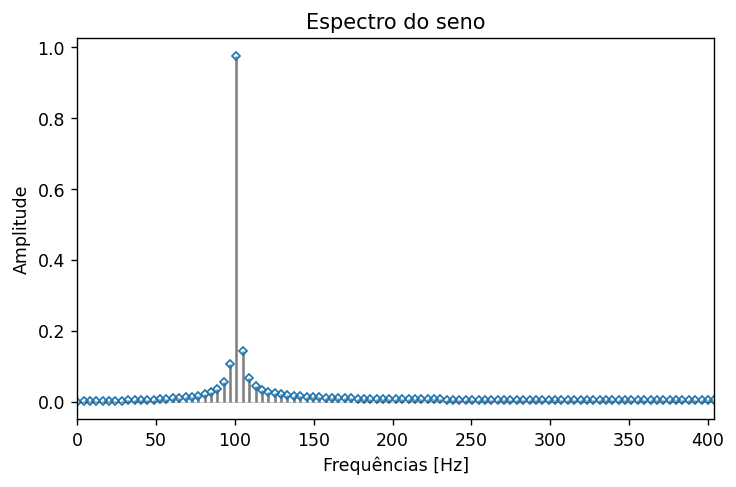

In [6]:
numero_amostras_2 = 100
tempo_total_2 = 0.25

amostras_2 = np.linspace(0,tempo_total_2,2*numero_amostras_2+1)
resposta_2 = g(amostras_2)

resposta_espectral_2 = np.abs(fftshift(fft(resposta_2)))/numero_amostras_2
frequencias_2 = np.linspace(0,(numero_amostras_2+1)/tempo_total_2,numero_amostras_2+1)
fig = plt.figure(dpi=125)
ax = fig.add_subplot(111)
ax.set_ylabel("Amplitude")
ax.set_xlabel("Frequências [Hz]")
ax.set_title("Espectro do seno")
markerline, stemlines, baseline = plt.stem(frequencias_2,
                                           resposta_espectral_2[numero_amostras_2:],
                                           linefmt='gray',
                                           markerfmt='D',
                                           basefmt='black',
                                           use_line_collection=True)
markerline.set_markerfacecolor('none')
baseline.set_linewidth(0.6)
baseline.set_alpha(0.2)
markerline.set_markersize(3)
ax.set_xlim([0,frequencias_2[-1]])
plt.tight_layout()

In [7]:
resposta_espectral_pos_2 = resposta_espectral_2[numero_amostras_2:]

print("Valor do pico: {:.2f}".format(resposta_espectral_pos_2[25]))
print('{:=^40}'.format(''))
print("Amplitudes adjacentes: {:.2f}\t{:.2f}".format(resposta_espectral_pos_2[24],
                                                     resposta_espectral_pos_2[26]))

Valor do pico: 0.98
Amplitudes adjacentes: 0.11	0.14


Novamente, o valor obtido nas frequências adjacentes é muito menor que o necessário para o cálculo da banda de meia potência. Mesmo assim, se usarmos estes valores no cálculo:

In [8]:
amortecimento_2 = ((frequencias_2[26]**2 - frequencias_2[24]**2)
                   / (2*frequencias_2[25]**2))
print("Fator de amortecimento: {:.4f}".format(amortecimento_2))

Fator de amortecimento: 0.0800


### Questão 3
Agora temos $102$ amostras com tempo total de sinal de $0,255\,\mathrm{s}$.

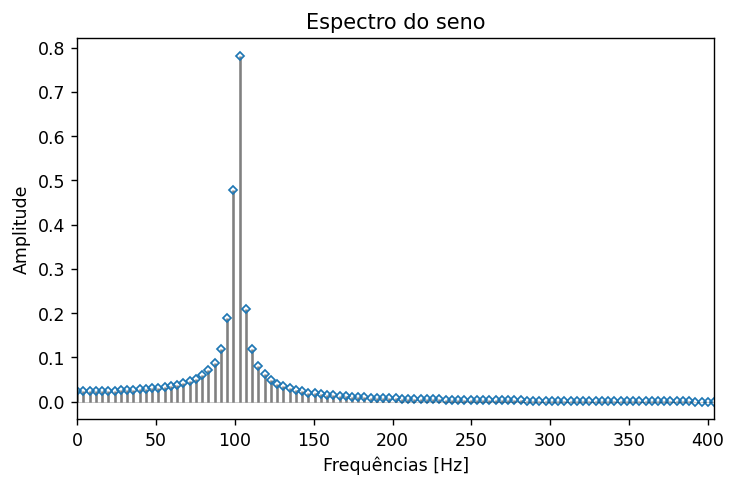

In [9]:
numero_amostras_3 = 102
tempo_total_3 = 0.255

amostras_3 = np.linspace(0,tempo_total_3,2*numero_amostras_3+1)
resposta_3 = g(amostras_3)

resposta_espectral_3 = np.abs(fftshift(fft(resposta_3)))/numero_amostras_3
frequencias_3 = np.linspace(0,(numero_amostras_3+1)/tempo_total_3,numero_amostras_3+1)
fig = plt.figure(dpi=125)
ax = fig.add_subplot(111)
ax.set_ylabel("Amplitude")
ax.set_xlabel("Frequências [Hz]")
ax.set_title("Espectro do seno")
markerline, stemlines, baseline = plt.stem(frequencias_3,
                                           resposta_espectral_3[numero_amostras_3:],
                                           linefmt='gray',
                                           markerfmt='D',
                                           basefmt='black',
                                           use_line_collection=True)
markerline.set_markerfacecolor('none')
baseline.set_linewidth(0.6)
baseline.set_alpha(0.2)
markerline.set_markersize(3)
ax.set_xlim([0,frequencias_3[-1]])
plt.tight_layout()

In [10]:
resposta_espectral_pos_3 = resposta_espectral_3[numero_amostras_3:]

print("Valor do pico: {:.2f}".format(resposta_espectral_pos_3[26]))
print('{:=^40}'.format(''))
print("Amplitudes adjacentes: {:.2f}\t{:.2f}".format(resposta_espectral_pos_3[25],
                                                     resposta_espectral_pos_3[27]))

Valor do pico: 0.78
Amplitudes adjacentes: 0.48	0.21


Agora o espectro apresentou uma distorção próxima ao pico. Porém, mesmo os valores adjacentes ainda são menores do que os valores necessários para calcular o fator de amortecimento usando a banda de meia potência.

### Questão 4

Agora serão acrescentados $300$ zeros ao final do sinal.

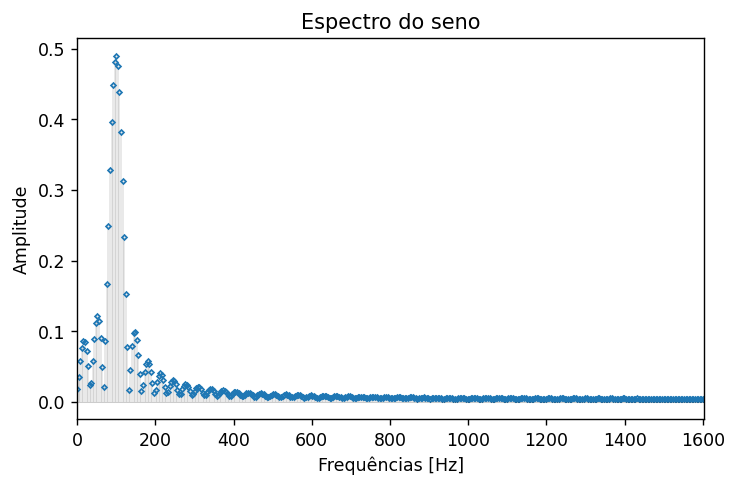

In [11]:
numero_amostras_4 = 100
tempo_total_4 = 0.25
numero_zeros_4 = 300
amostras_4 = np.linspace(0,tempo_total_4,2*numero_amostras_4
                         +2*numero_zeros_4+1)
resposta_4 = g(amostras_4)
resposta_zero_padding_4 = np.zeros(np.size(resposta_4))
resposta_zero_padding_4[numero_zeros_4:numero_zeros_4
                        +numero_amostras_4+1] = resposta_4[numero_zeros_4:numero_zeros_4
                                                           +numero_amostras_4+1]

resposta_espectral_4 = (np.abs(fftshift(fft(resposta_zero_padding_4)))
                        /(numero_amostras_4))
frequencias_4 = np.linspace(0,(numero_amostras_4+numero_zeros_4+1)/tempo_total_4,
                            numero_amostras_4+numero_zeros_4+1)
fig = plt.figure(dpi=125)
ax = fig.add_subplot(111)
ax.set_ylabel("Amplitude")
ax.set_xlabel("Frequências [Hz]")
ax.set_title("Espectro do seno")
markerline, stemlines, baseline = plt.stem(frequencias_4,
                                           resposta_espectral_4[numero_zeros_4+numero_amostras_4:],
                                           linefmt='black',
                                           markerfmt='D',
                                           basefmt='black',
                                           use_line_collection=True)
markerline.set_markerfacecolor('none')
baseline.set_linewidth(0.6)
baseline.set_alpha(0.2)
markerline.set_markersize(2)
stemlines.set_linewidth(0.1)
ax.set_xlim([0,frequencias_4[-1]])
plt.tight_layout()

Percebe-se que a energia próxima do pico é "vazada" (_leakage_) para os elementos espectrais adjacentes. As informações que podemos extrair do gráfico parece pior, já que os picos são menores do que no caso da Questão 2, resultando num fator de amortecimento maior (e portanto de menor sentido físico).

### Questão 5

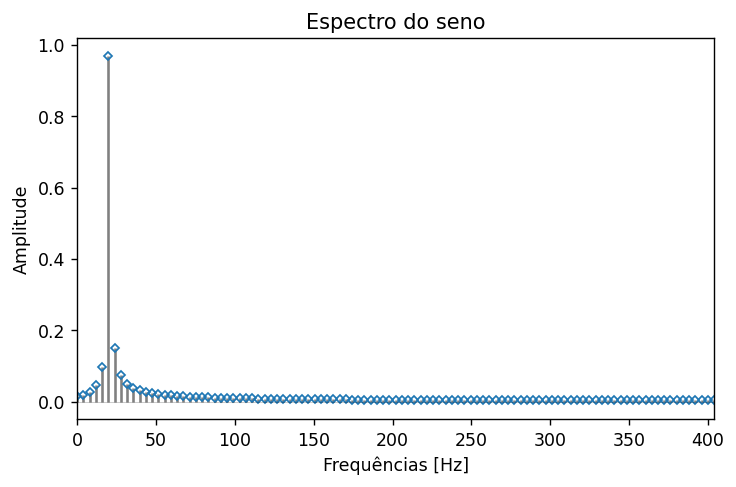

In [12]:
# Definição dos parâmetros do problema
frequencia_5 = 20 # [Hz]
g = lambda t: np.sin(2*np.pi*t*frequencia_5)
numero_amostras_5 = 102
tempo_total_5 = 0.255

amostras_5 = np.linspace(0,tempo_total_5,2*numero_amostras_5+1)
resposta_5 = g(amostras_5)

resposta_espectral_5 = np.abs(fftshift(fft(resposta_5)))/numero_amostras_5
frequencias_5 = np.linspace(0,(numero_amostras_5+1)/tempo_total_5,numero_amostras_5+1)
fig = plt.figure(dpi=125)
ax = fig.add_subplot(111)
ax.set_ylabel("Amplitude")
ax.set_xlabel("Frequências [Hz]")
ax.set_title("Espectro do seno")
markerline, stemlines, baseline = plt.stem(frequencias_5,
                                           resposta_espectral_5[numero_amostras_5:],
                                           linefmt='gray',
                                           markerfmt='D',
                                           basefmt='black',
                                           use_line_collection=True)
markerline.set_markerfacecolor('none')
markerline.set_markersize(3)
baseline.set_linewidth(0.6)
baseline.set_alpha(0.2)
ax.set_xlim([0,frequencias_5[-1]])
plt.tight_layout()

Novamente, devida à proximidade dos valores adjacentes ao pico, é inviável o cálculo da banda de meia potência usando este método. Porém, para efeitos de completude, seguem os cálculos:

In [13]:
amortecimento_5 = ((frequencias_5[6]**2 - frequencias_5[4]**2)
                   / (2*frequencias_5[5]**2))
print("Fator de amortecimento: {:.4f}".format(amortecimento_5))
print("{:=^40}".format(''))
rms_sinal_5 = np.sqrt(resposta_5@resposta_5/np.size(resposta_5))
print("RMS da resposta: {:.5}".format(rms_sinal_5))
print("{:=^40}".format(''))
soma_magnitudes_5 = resposta_espectral_5[numero_amostras_5:]@resposta_espectral_5[numero_amostras_5:]
print("Soma das magnitudes ao quadrado do espectro: {:.5f}".format(soma_magnitudes_5))
print("{:=^40}".format(""))
print("Razão Magnitudes ao quadrado/RMS: {:.5f}".format(soma_magnitudes_5
                                                        /rms_sinal_5))

Fator de amortecimento: 0.4000
RMS da resposta: 0.70077
Soma das magnitudes ao quadrado do espectro: 0.99192
Razão Magnitudes ao quadrado/RMS: 1.41547


Novamente a razão entre as duas é aproximadamente $\sqrt{2}$.

### Questão 6

A ideia aqui é usar uma janela Hanning.

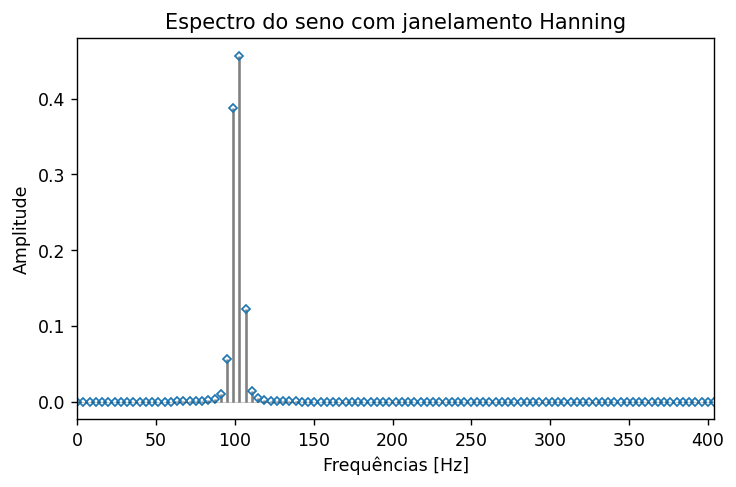

In [14]:
from scipy.signal.windows import hann
frequencia_6 = 100 # [Hz]
g = lambda t: np.sin(2*np.pi*t*frequencia_6)

numero_amostras_6 = 102
tempo_total_6 = 0.255

amostras_6 = np.linspace(0,tempo_total_6,2*numero_amostras_6+1)
resposta_6 = g(amostras_6)

# Janela Hann(ing)
janela_6 = hann(2*numero_amostras_6+1)

resposta_janelada_6 = janela_6 * resposta_6

resposta_espectral_6 = np.abs(fftshift(fft(resposta_janelada_6)))/numero_amostras_6
frequencias_6 = np.linspace(0,(numero_amostras_6+1)/tempo_total_6,numero_amostras_6+1)
fig = plt.figure(dpi=125)
ax = fig.add_subplot(111)
ax.set_ylabel("Amplitude")
ax.set_xlabel("Frequências [Hz]")
ax.set_title("Espectro do seno com janelamento Hanning")
markerline, stemlines, baseline = plt.stem(frequencias_6,
                                           resposta_espectral_6[numero_amostras_6:],
                                           linefmt='gray',
                                           markerfmt='D',
                                           basefmt='black',
                                           use_line_collection=True)
markerline.set_markerfacecolor('none')
markerline.set_markersize(3)
baseline.set_linewidth(0.6)
baseline.set_alpha(0.2)
ax.set_xlim([0,frequencias_6[-1]])
plt.tight_layout()

Comparação entre as transformadas do sinal com e sem janelamento:

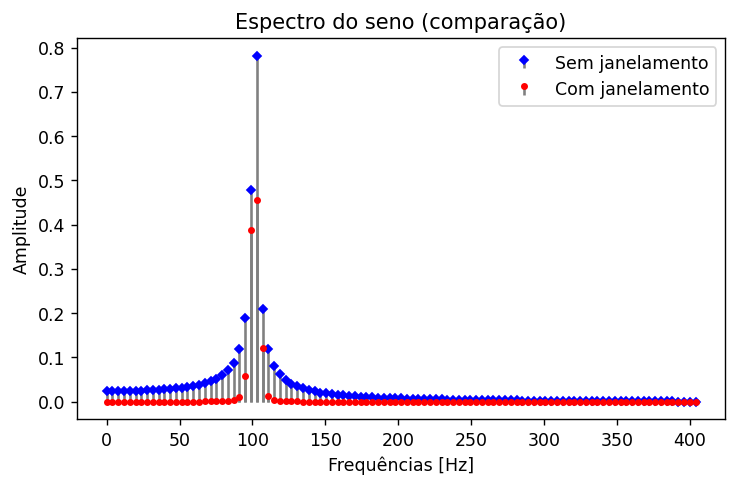

In [15]:
fig = plt.figure(dpi=125)
ax2 = fig.add_subplot(111)
ax2.set_ylabel("Amplitude")
ax2.set_xlabel("Frequências [Hz]")
ax2.set_title("Espectro do seno (comparação)")
markerline, stemlines, baseline = plt.stem(frequencias_3,
                                           resposta_espectral_3[numero_amostras_3:],
                                           linefmt='gray',
                                           basefmt='none',
                                           markerfmt='D',
                                           use_line_collection=True,
                                           label="Sem janelamento")
markerline.set_markerfacecolor('blue')
markerline.set_markersize(3)
markerline.set_markeredgecolor('blue')

markerline_2, stemlines_2, baseline_2 = plt.stem(frequencias_6,
                                                 resposta_espectral_6[numero_amostras_6:],
                                                 linefmt='grey',
                                                 basefmt="none",
                                                 markerfmt='o',
                                                 use_line_collection=True,
                                                 label="Com janelamento")
markerline_2.set_markerfacecolor('red')
markerline_2.set_markersize(3)
markerline_2.set_markeredgecolor('red')
plt.legend()
ax.set_xlim([0,frequencias_6[-1]])
plt.tight_layout()

### Questão 7
Agora será considerada uma janela exponencial da forma:
$$w(t) = \mathrm{e}^{-\zeta\omega t} $$

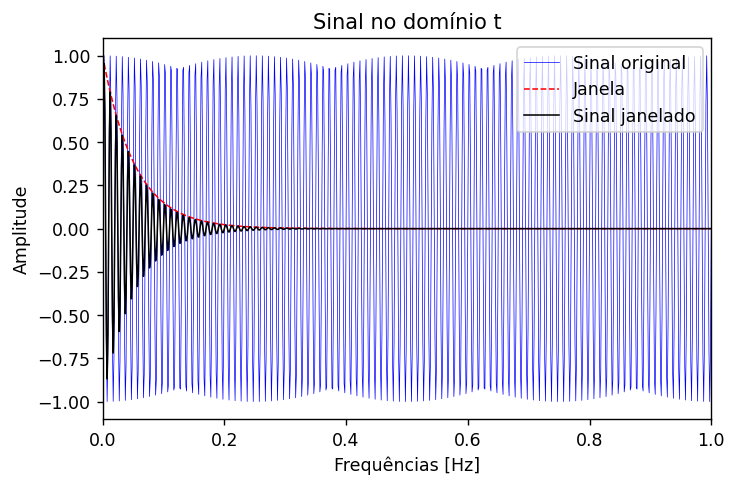

In [16]:
# Definição dos parâmetros do problema
frequencia_7 = 100 # [Hz]
g = lambda t: np.sin(2*np.pi*t*frequencia_7)
numero_amostras_7 = 402
tempo_total_7 = 1

amostras_7 = np.linspace(0,tempo_total_7,2*numero_amostras_7+1)
resposta_7 = g(amostras_7)

zeta = 0.03
janela_7 = lambda t: np.exp(-zeta*(2*np.pi*frequencia_7)*t)
resposta_janelada_7 = janela_7(amostras_7)*resposta_7
fig = plt.figure(dpi=125)
ax = fig.add_subplot(111)
ax.set_xlabel("Frequências [Hz]")
ax.set_ylabel("Amplitude")
ax.set_title("Sinal no domínio t")
plt.plot(amostras_7,resposta_7, 'b', lw=0.4, label="Sinal original")
plt.plot(amostras_7, janela_7(amostras_7),'r--',lw=0.9, label="Janela")
plt.plot(amostras_7,resposta_janelada_7, 'k', lw=0.9, label="Sinal janelado")
plt.legend(loc='upper right')
ax.set_xlim([0,amostras_7[-1]])
plt.tight_layout()

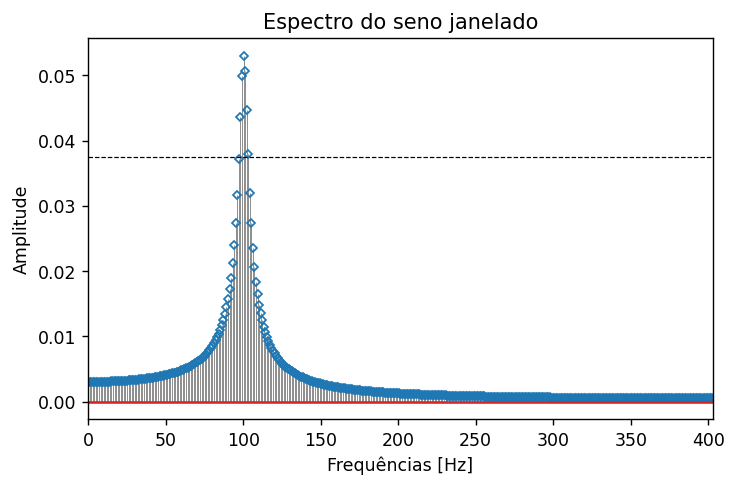

In [17]:
resposta_espectral_7 = np.abs(fftshift(fft(resposta_janelada_7)))/numero_amostras_7
frequencias_7 = np.linspace(0,numero_amostras_7+1,numero_amostras_7+1)
posicao_pico_7 = np.argmax(resposta_espectral_7[numero_amostras_7:])
amplitude_hpp_7 = resposta_espectral_7[posicao_pico_7+numero_amostras_7]/np.sqrt(2)

fig = plt.figure(dpi=125)
ax = fig.add_subplot(111)
ax.set_ylabel("Amplitude")
ax.set_xlabel("Frequências [Hz]")
ax.set_title("Espectro do seno janelado")
markerline, stemlines, baseline = plt.stem(frequencias_7,
                                           resposta_espectral_7[numero_amostras_7:],
                                           linefmt='gray',
                                           markerfmt='D',
                                           use_line_collection=True)
markerline.set_markerfacecolor('none')
markerline.set_markersize(3)
stemlines.set_linewidth(.5)
plt.plot(frequencias_7, np.ones(np.size(frequencias_7))*amplitude_hpp_7,'k--',lw=0.7)
ax.set_xlim([0,frequencias_7[-1]])
plt.tight_layout()

Como pode ser observado no gráfico acima, as frequências para calcular o amortecimento a partir da banda de meia potência estão a uma distância de três frequências discretas da frequência de pico. Sendo assim:

In [18]:
amortecimento_7 = ((frequencias_7[posicao_pico_7+3]**2
                    -frequencias_7[posicao_pico_7-3]**2)
                    /(2*frequencias_7[posicao_pico_7]**2))
print("Valor da banda de meia potência: {}".format(amortecimento_7))

Valor da banda de meia potência: 0.05999999999999992


O valor encontrado é consistente com o esperado $\left(\eta=2\zeta\right)$.

### Questão 8

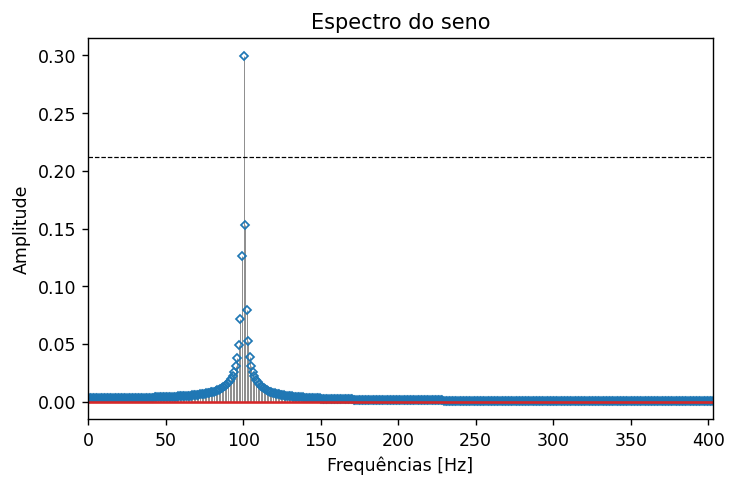

In [19]:
# Definição dos parâmetros do problema
frequencia_8 = 100 # [Hz]
g = lambda t: np.sin(2*np.pi*t*frequencia_8)
numero_amostras_8 = 402
tempo_total_8 = 1

amostras_8 = np.linspace(0,tempo_total_8,2*numero_amostras_8+1)
resposta_8 = g(amostras_8)

# Amortecimento estrutural
zeta_est_8 = 0.005
amort_estrutural_8 = lambda t: np.exp(-zeta_est_8*(2*np.pi*frequencia_8)*t)
resposta_amort_8 = amort_estrutural_8(amostras_8)*resposta_8

resposta_espectral_8 = np.abs(fftshift(fft(resposta_amort_8)))/numero_amostras_8
frequencias_8 = np.linspace(0,numero_amostras_8+1,numero_amostras_8+1)
posicao_pico_8 = np.argmax(resposta_espectral_8[numero_amostras_8:])
amplitude_hpp_8 = resposta_espectral_8[posicao_pico_8+numero_amostras_8]/np.sqrt(2)

fig = plt.figure(dpi=125)
ax = fig.add_subplot(111)
ax.set_ylabel("Amplitude")
ax.set_xlabel("Frequências [Hz]")
ax.set_title("Espectro do seno")
markerline, stemlines, baseline = plt.stem(frequencias_8,
                                           resposta_espectral_8[numero_amostras_8:],
                                           linefmt='gray',
                                           markerfmt='D',
                                           use_line_collection=True)
markerline.set_markerfacecolor('none')
markerline.set_markersize(3)
stemlines.set_linewidth(.5)
plt.plot(frequencias_8, np.ones(np.size(frequencias_8))*amplitude_hpp_8,'k--',lw=0.7)
ax.set_xlim([0,frequencias_8[-1]])
plt.tight_layout()

Novamente, devida à grande diferença entre as frequências adjacentes à frequência de pico e o valor da banda de meia potência, não é possível calcular o fator de amortecimento neste caso (seriam necessárias mais amostras).

Aplicando um fator de amortecimento $\zeta = 0,\!06$:

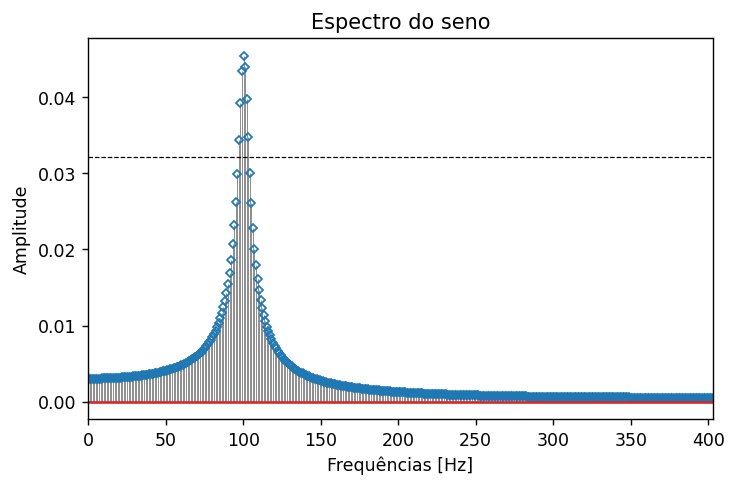

In [20]:
# Definição dos parâmetros do problema
frequencia_8 = 100 # [Hz]
g = lambda t: np.sin(2*np.pi*t*frequencia_8)
numero_amostras_8 = 402
tempo_total_8 = 1

amostras_8 = np.linspace(0,tempo_total_8,2*numero_amostras_8+1)
resposta_8 = g(amostras_8)

zeta_8 = 0.03
janela_8 = lambda t: np.exp(-zeta_8*(2*np.pi*frequencia_8)*t)
resposta_janelada_8 = janela_8(amostras_8)*resposta_amort_8

resposta_espectral_8 = np.abs(fftshift(fft(resposta_janelada_8)))/numero_amostras_8
frequencias_8 = np.linspace(0,numero_amostras_8+1,numero_amostras_8+1)
posicao_pico_8 = np.argmax(resposta_espectral_8[numero_amostras_8:])
amplitude_hpp_8 = resposta_espectral_8[posicao_pico_8+numero_amostras_8]/np.sqrt(2)

fig = plt.figure(dpi=125)
ax = fig.add_subplot(111)
ax.set_ylabel("Amplitude")
ax.set_xlabel("Frequências [Hz]")
ax.set_title("Espectro do seno")
markerline, stemlines, baseline = plt.stem(frequencias_8,
                                           resposta_espectral_8[numero_amostras_8:],
                                           linefmt='gray',
                                           markerfmt='D',
                                           use_line_collection=True)
markerline.set_markerfacecolor('none')
markerline.set_markersize(3)
stemlines.set_linewidth(.5)
plt.plot(frequencias_8, np.ones(np.size(frequencias_8))*amplitude_hpp_8,'k--',lw=0.7)
ax.set_xlim([0,frequencias_8[-1]])
plt.tight_layout()

In [21]:
amortecimento_8 = ((frequencias_8[posicao_pico_8+3]**2
                    -frequencias_8[posicao_pico_8-3]**2)
                    /(2*frequencias_8[posicao_pico_8]**2))
print("Valor da banda de meia potência: {}".format(amortecimento_8))


Valor da banda de meia potência: 0.05999999999999992
